# Problem Description

- Given 4 features i.e Sepal Width, Sepal Length, Petal Width and Petal Length need to find the category of flower
- Multicategory Problem, target values are : ['setosa' 'versicolor' 'virginica']

# Importing Libraries

In [115]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
sns.set() # setting seaborn default for plots

# Loading the dataset

In [2]:
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [6]:
iris_df['target'] = pd.Series(iris['target'])
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


# Exploratory Data Analysis

In [9]:
iris_df.shape

(150, 5)

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris_df.groupby('target').describe().T

target                           0          1          2
sepal length (cm) count  50.000000  50.000000  50.000000
                  mean    5.006000   5.936000   6.588000
                  std     0.352490   0.516171   0.635880
                  min     4.300000   4.900000   4.900000
                  25%     4.800000   5.600000   6.225000
                  50%     5.000000   5.900000   6.500000
                  75%     5.200000   6.300000   6.900000
                  max     5.800000   7.000000   7.900000
sepal width (cm)  count  50.000000  50.000000  50.000000
                  mean    3.428000   2.770000   2.974000
                  std     0.379064   0.313798   0.322497
                  min     2.300000   2.000000   2.200000
                  25%     3.200000   2.525000   2.800000
                  50%     3.400000   2.800000   3.000000
                  75%     3.675000   3.000000   3.175000
                  max     4.400000   3.400000   3.800000
petal length (cm) count  50.000000  50.000000  50.000000
                  mean    1.462000   4.260000   5.552000
                  std     0.173664   0.469911   0.551895
                  min     1.000000   3.000000   4.500000
                  25%     1.400000   4.000000   5.100000
                  50%     1.500000   4.350000   5.550000
                  75%     1.575000   4.600000   5.875000
                  max     1.900000   5.100000   6.900000
petal width (cm)  count  50.000000  50.000000  50.000000
                  mean    0.246000   1.326000   2.026000
                  std     0.105386   0.197753   0.274650
                  min     0.100000   1.000000   1.400000
                  25%     0.200000   1.200000   1.800000
                  50%     0.200000   1.300000   2.000000
                  75%     0.300000   1.500000   2.300000
                  max     0.600000   1.800000   2.500000

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [120]:
iris_df['target'].unique()

array([0, 1, 2])

In [14]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


no missing values

In [15]:
iris_df.corr().iloc[:4, -1:]

,target
sepal length (cm),0.782561
sepal width (cm),-0.426658
petal length (cm),0.949035
petal width (cm),0.956547


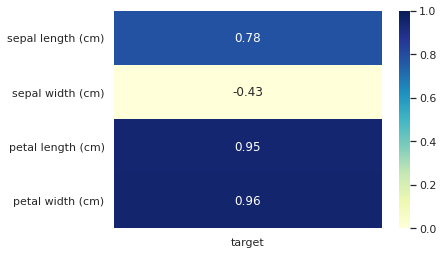

In [16]:
sns.heatmap(iris_df.corr().iloc[:4, -1:], cmap="YlGnBu", annot=True, vmax=1, vmin=0)
plt.show()

In [17]:
iris_df.groupby('target').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


50 for each type.

# Preprocessing the data

## Handling outliers

**finding them**

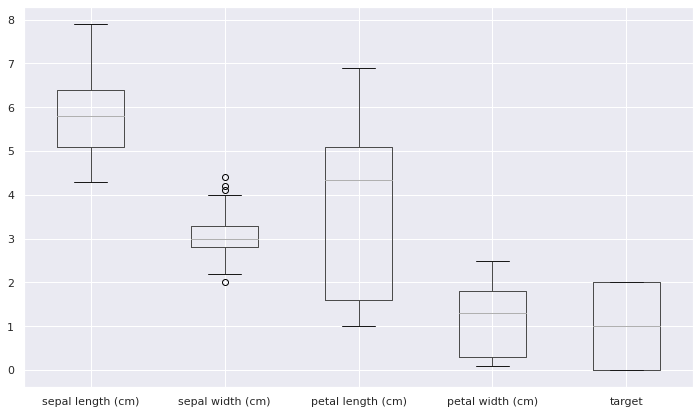

In [18]:
iris_df.boxplot(figsize=(12,7))

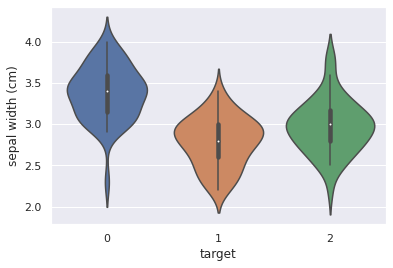

In [125]:
sns.violinplot(x=iris_df["target"], y=iris_df["sepal width (cm)"])
plt.show()

outliers in sepal width

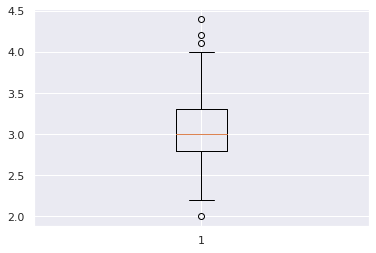

In [19]:
plt.boxplot(iris_df['sepal width (cm)'])
plt.show()

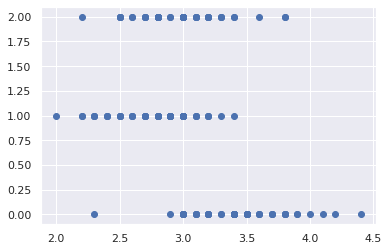

In [20]:
plt.scatter(iris_df['sepal width (cm)'], iris_df['target'])

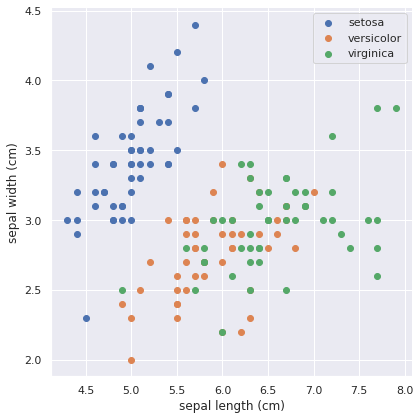

In [21]:
sns.FacetGrid(iris_df, hue="target", height=6) \
    .map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)')

plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

Here we see that 1 outlier is about `versicolor` and the other 3 are about `setosa`.

**removing them**

- z_score

In [22]:
# threshold=2.5
z = np.abs(stats.zscore(iris_df))
print(np.where(z > 2.5))

(array([15, 33]), array([1, 1]))


In [23]:
z[33][1]

2.6303817157821316

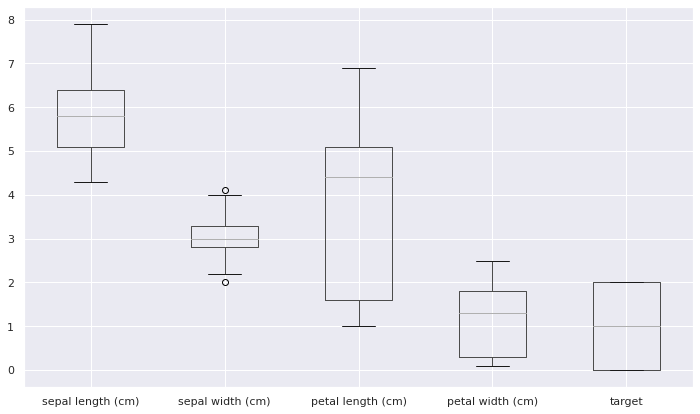

In [24]:
iris_df[(z < 2.5).all(axis=1)].boxplot(figsize=(12,7))

the z_score got two outliers. we need more 2.

Let's see through IQR...

- IQR

In [25]:
# IQR
Q1 = iris_df.quantile(0.25)
Q3 = iris_df.quantile(0.75)
IQR = Q3 - Q1
iris_df[~((iris_df < (Q1 - 1.5 * IQR)) 
          | (iris_df > (Q3 + 1.5 * IQR)))
        .any(axis=1)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


146 rows... looks like the IQR removes the 4 outliers that we need. Let's see it through the boxplot.

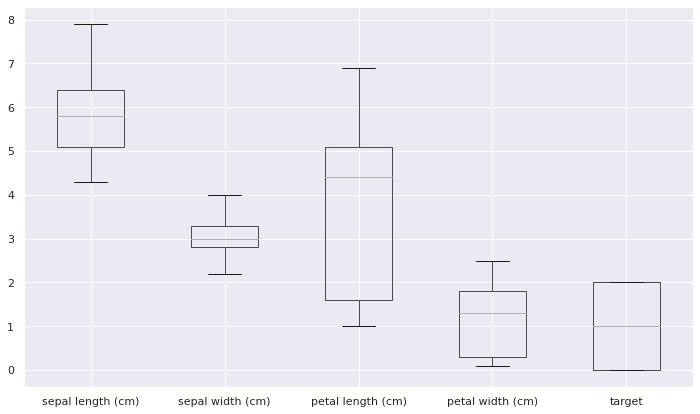

In [26]:
iris_df[~((iris_df < (Q1 - 1.5 * IQR)) 
          | (iris_df > (Q3 + 1.5 * IQR)))
        .any(axis=1)].boxplot(figsize=(12,7))

YES! IQR removes exactly what we want!

So... let's remove through IQR

In [29]:
iris_df[((iris_df < (Q1 - 1.5 * IQR)) 
          | (iris_df > (Q3 + 1.5 * IQR)))
        .any(axis=1)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


If we check it by hand (seeing the scatterplot numbers)... <br>
We realize that the points are under 2.1 and above 4. So...

In [30]:
iris_df[(iris_df['sepal width (cm)'] < 2.1) 
        | (iris_df['sepal width (cm)'] > 4)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


they are exactly the same registrations.

In [31]:
# We can remove by hand
#iris_df = iris_df[~((iris_df['sepal width (cm)'] < 2.1) 
#                    | (iris_df['sepal width (cm)'] > 4))]

# or

# We can remove through IQR
iris_df = iris_df[~((iris_df < (Q1 - 1.5 * IQR)) 
                    | (iris_df > (Q3 + 1.5 * IQR)))
                  .any(axis=1)]

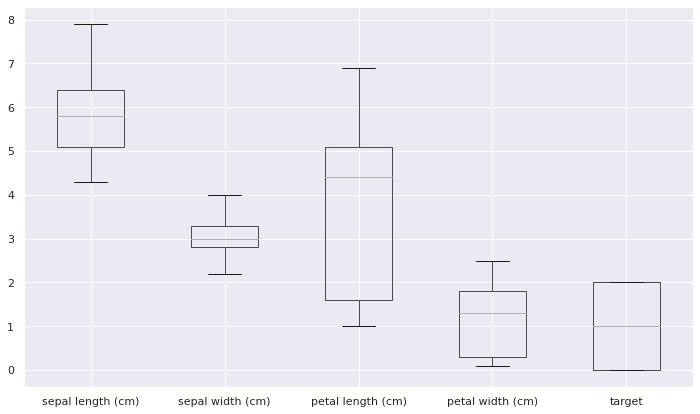

In [32]:
iris_df.boxplot(figsize=(12,7))

In [33]:
iris_df['target'].value_counts()

2    50
1    49
0    47
Name: target, dtype: int64

## Feature Engineering

All the features are enconding categorical variables. <br>
There is no features to create, remove or transform.

## Splitting dataframes

In [37]:
train = iris_df.drop('target', axis=1)
train.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [46]:
target = iris_df['target']
target.head(2)

0    0
1    0
Name: target, dtype: int64

## Checking the dataframes

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  146 non-null    float64
 1   sepal width (cm)   146 non-null    float64
 2   petal length (cm)  146 non-null    float64
 3   petal width (cm)   146 non-null    float64
dtypes: float64(4)
memory usage: 10.7 KB


In [41]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  146 non-null    int64
dtypes: int64(1)
memory usage: 7.3 KB


no missing values. <br>

# Modeling

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve

from sklearn.model_selection import KFold, cross_val_score, cross_validate, cross_val_predict

## Cross validation kfold

In [73]:
k_fold = KFold(n_splits=13, shuffle=True, random_state=0)

## Evaluating algorithms performance

- KNeighborsClassifier

In [74]:
# accuracy
clf_knn = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf_knn, train, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)
print(round(np.mean(score)*100, 2))

[1.         1.         1.         1.         1.         0.81818182
 1.         1.         1.         1.         0.90909091 1.
 1.        ]
97.9


In [106]:
# confusion_matrix
y_pred = cross_val_predict(clf_knn, train, target, cv=k_fold, n_jobs=1)
confusion_matrix(target, y_pred)

array([[47,  0,  0],
       [ 0, 47,  2],
       [ 0,  1, 49]])

- DecisionTreeClassifier

In [103]:
# accuracy
clf_dt = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf_dt, train, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)
print(round(np.mean(score)*100, 2))

[1.         1.         1.         0.90909091 0.90909091 0.81818182
 1.         1.         1.         1.         0.90909091 0.90909091
 1.        ]
95.8


In [107]:
# confusion_matrix
y_pred = cross_val_predict(clf_dt, train, target, cv=k_fold, n_jobs=1)
confusion_matrix(target, y_pred)

array([[47,  0,  0],
       [ 0, 46,  3],
       [ 0,  4, 46]])

- RandomForestClassifier

In [54]:
# accuracy
clf_rf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf_rf, train, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)
print(round(np.mean(score)*100, 2))

[0.93333333 1.         0.93333333 1.         0.86666667 1.
 1.         0.92857143 0.85714286 1.        ]
95.19


In [111]:
# confusion_matrix
y_pred = cross_val_predict(clf_rf, train, target, cv=k_fold, n_jobs=1)
confusion_matrix(target, y_pred)

array([[47,  0,  0],
       [ 0, 45,  4],
       [ 0,  4, 46]])

- GaussianNB

In [63]:
# accuracy
clf_gnb = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf_gnb, train, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)
print(round(np.mean(score)*100, 2))

[0.93333333 1.         0.93333333 0.93333333 0.86666667 1.
 1.         0.92857143 0.92857143 1.        ]
95.24


In [112]:
# confusion_matrix
y_pred = cross_val_predict(clf_gnb, train, target, cv=k_fold, n_jobs=1)
confusion_matrix(target, y_pred)

array([[47,  0,  0],
       [ 0, 46,  3],
       [ 0,  4, 46]])

- SVM

In [93]:
# accuracy
clf_svm = SVC()
scoring = 'accuracy'
score = cross_val_score(clf_svm, train, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)
print(round(np.mean(score)*100, 2))

[1.         1.         1.         0.81818182 0.90909091 0.81818182
 1.         1.         1.         0.90909091 0.90909091 1.
 1.        ]
95.1


In [113]:
# confusion_matrix
y_pred = cross_val_predict(clf_svm, train, target, cv=k_fold, n_jobs=1)
confusion_matrix(target, y_pred)

array([[47,  0,  0],
       [ 0, 46,  3],
       [ 0,  4, 46]])

- LogisticRegression

In [101]:
# accuracy
clf_lr = LogisticRegression(solver='liblinear', multi_class='auto')
scoring = 'accuracy'
score = cross_val_score(clf_lr, train, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)
print(round(np.mean(score)*100, 2))

[1.         0.91666667 1.         1.         0.90909091 0.90909091
 1.         1.         1.         1.         0.90909091 0.81818182
 1.        ]
95.86


In [114]:
# confusion_matrix
y_pred = cross_val_predict(clf_lr, train, target, cv=k_fold, n_jobs=1)
confusion_matrix(target, y_pred)

array([[47,  0,  0],
       [ 0, 44,  5],
       [ 0,  1, 49]])